In [ ]:
#!pip install colormaps gdown
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import colormaps as cmp

Load the data files again, and take the zonal average over 10°W to 10°E.

In [ ]:
# Observations
!gdown {'1LP_poS2Sc1bFlctqHIRh9j8h5vAK2gBH'}
!gdown {'1yBWSyR6p7b5mbFyYaw0Y5-iXTRhFxU0B'}

# Reanalysis precipitation and OLR
!gdown {'1RnNiv4iTdQDOZYz6RCa8YznbWpW5vrwa'}
!gdown {'1X4iEDqSARpF8mWxrt8r2Zb1wk1qVgq7n'}
!gdown {'1ailuu8awjReWTzithgdo38T0hTeZRW34'}
!gdown {'1ARbfGEGGnexMUUyRD1IqbneM6aaQQNFL'}

# Reanalysis winds
!gdown {'1WUba4wF5uTVq4V_kaBZjNf-bv-bm-cGd'}
!gdown {'13h_UUFGwWd30f7v133ZQ6EqbMAlpJXc4'}

In [ ]:
obs = {}
obs['olr'] = xr.open_dataset('ceres_olr_1d_2001-2020.wam_grd.nc')['toa_lw_all_daily'].squeeze()
obs['prc'] = xr.open_dataset('imerg_v7_day_2001-2020.1x1.wam_grd.nc')['precipitation'].squeeze()

era5 = {}
era5['olr'] = -1*xr.open_dataset('ecmwf-era5_rlt_125.1d.2001-2020.wam_grd.nc')['MTNLWRF'].squeeze()
era5['prc'] = 86400*xr.open_dataset('ecmwf-era5_pr_125.1d.2001-2020.wam_grd.nc')['MTPR'].squeeze()
era5['u850'] = xr.open_dataset('ecmwf-era5_u850.1d.2001-2020.wam_grd.nc')['u'].squeeze()

jra3q = {}
jra3q['olr'] = xr.open_dataset('jma-jra3q_rlut_125.1d.2001-2020.wam_grd.nc')['ulwrf1have-toa-fc-ll125'].squeeze().sel(lon=slice(-10,10)).mean('lon')
jra3q['prc'] = 86400*xr.open_dataset('jma-jra3q_pr_125.1d.2001-2020.wam_grd.nc')['tprate1have-sfc-fc-ll125'].squeeze().sel(lon=slice(-10,10)).mean('lon')
jra3q['u850'] = xr.open_dataset('jma-jra3q_ua850_125.1d.2001-2020.wam_grd.nc')['ugrd-pres-an-ll125'].squeeze().sel(lon=slice(-10,10)).mean('lon')

In [ ]:
# take the zonal averages

Code to compute the mean annual cycles for the observational analyses is provided below. Extend this to also compute the mean annual cycles for the reanalysis variables.

In [ ]:
for kk in ['olr', 'prc']:
    obs[kk+'_ac'] = obs[kk].groupby('time.dayofyear').mean('time').rolling(dayofyear=10, center=True, min_periods=1).mean('dayofyear')

# add code for reanalyses

Create Hovmöller plots for the observed precipitation and OLR as a function of latitude (y axis) and day of year (x).

In [ ]:
# Create figures (examples below)

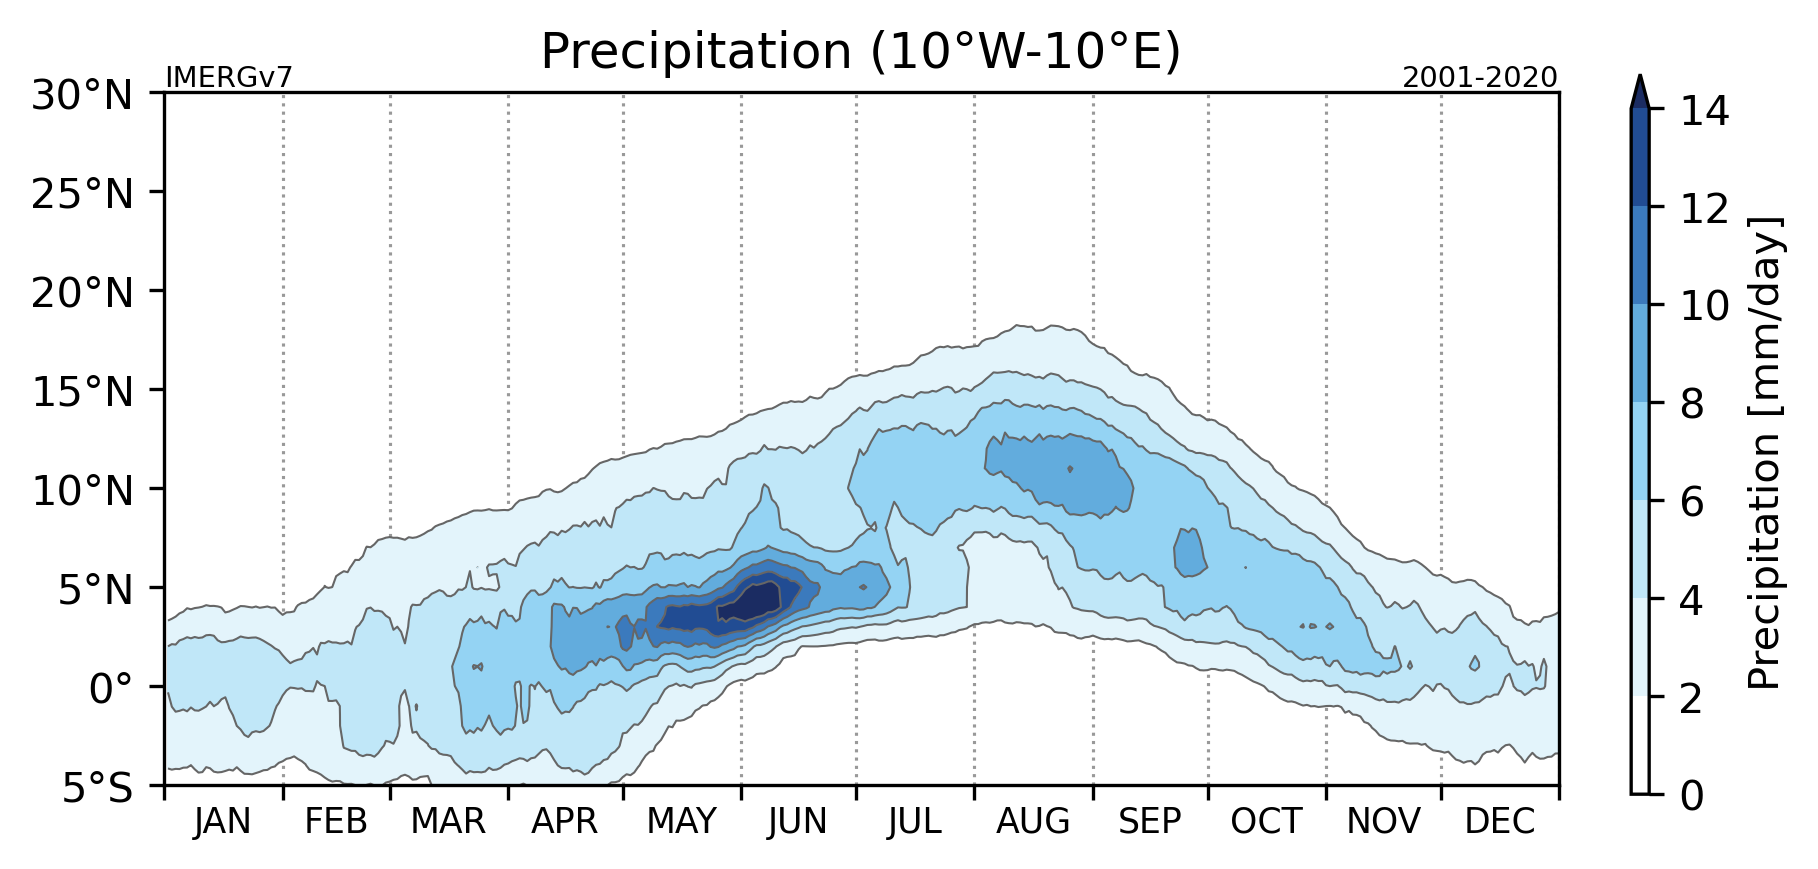



Plot figures that show Hovmöller plots for the observations and reanalysis products together. How well do the reanalyses reproduce the annual cycles of precipitation and OLR as the ITCZ migrates north and south within this range of longitudes?

In [ ]:
# create plots to show the mean annual cycles of precipitation and OLR in CERES/IMERG, ERA5, and JRA-3Q

Construct a similar plot for the reanalysis zonal winds (see example below). How clear is the wind reversal? At what latitudes is the reversal most evident?

In [ ]:
# create plots to show the mean annual cycles of zonal wind in ERA5 and JRA-3Q

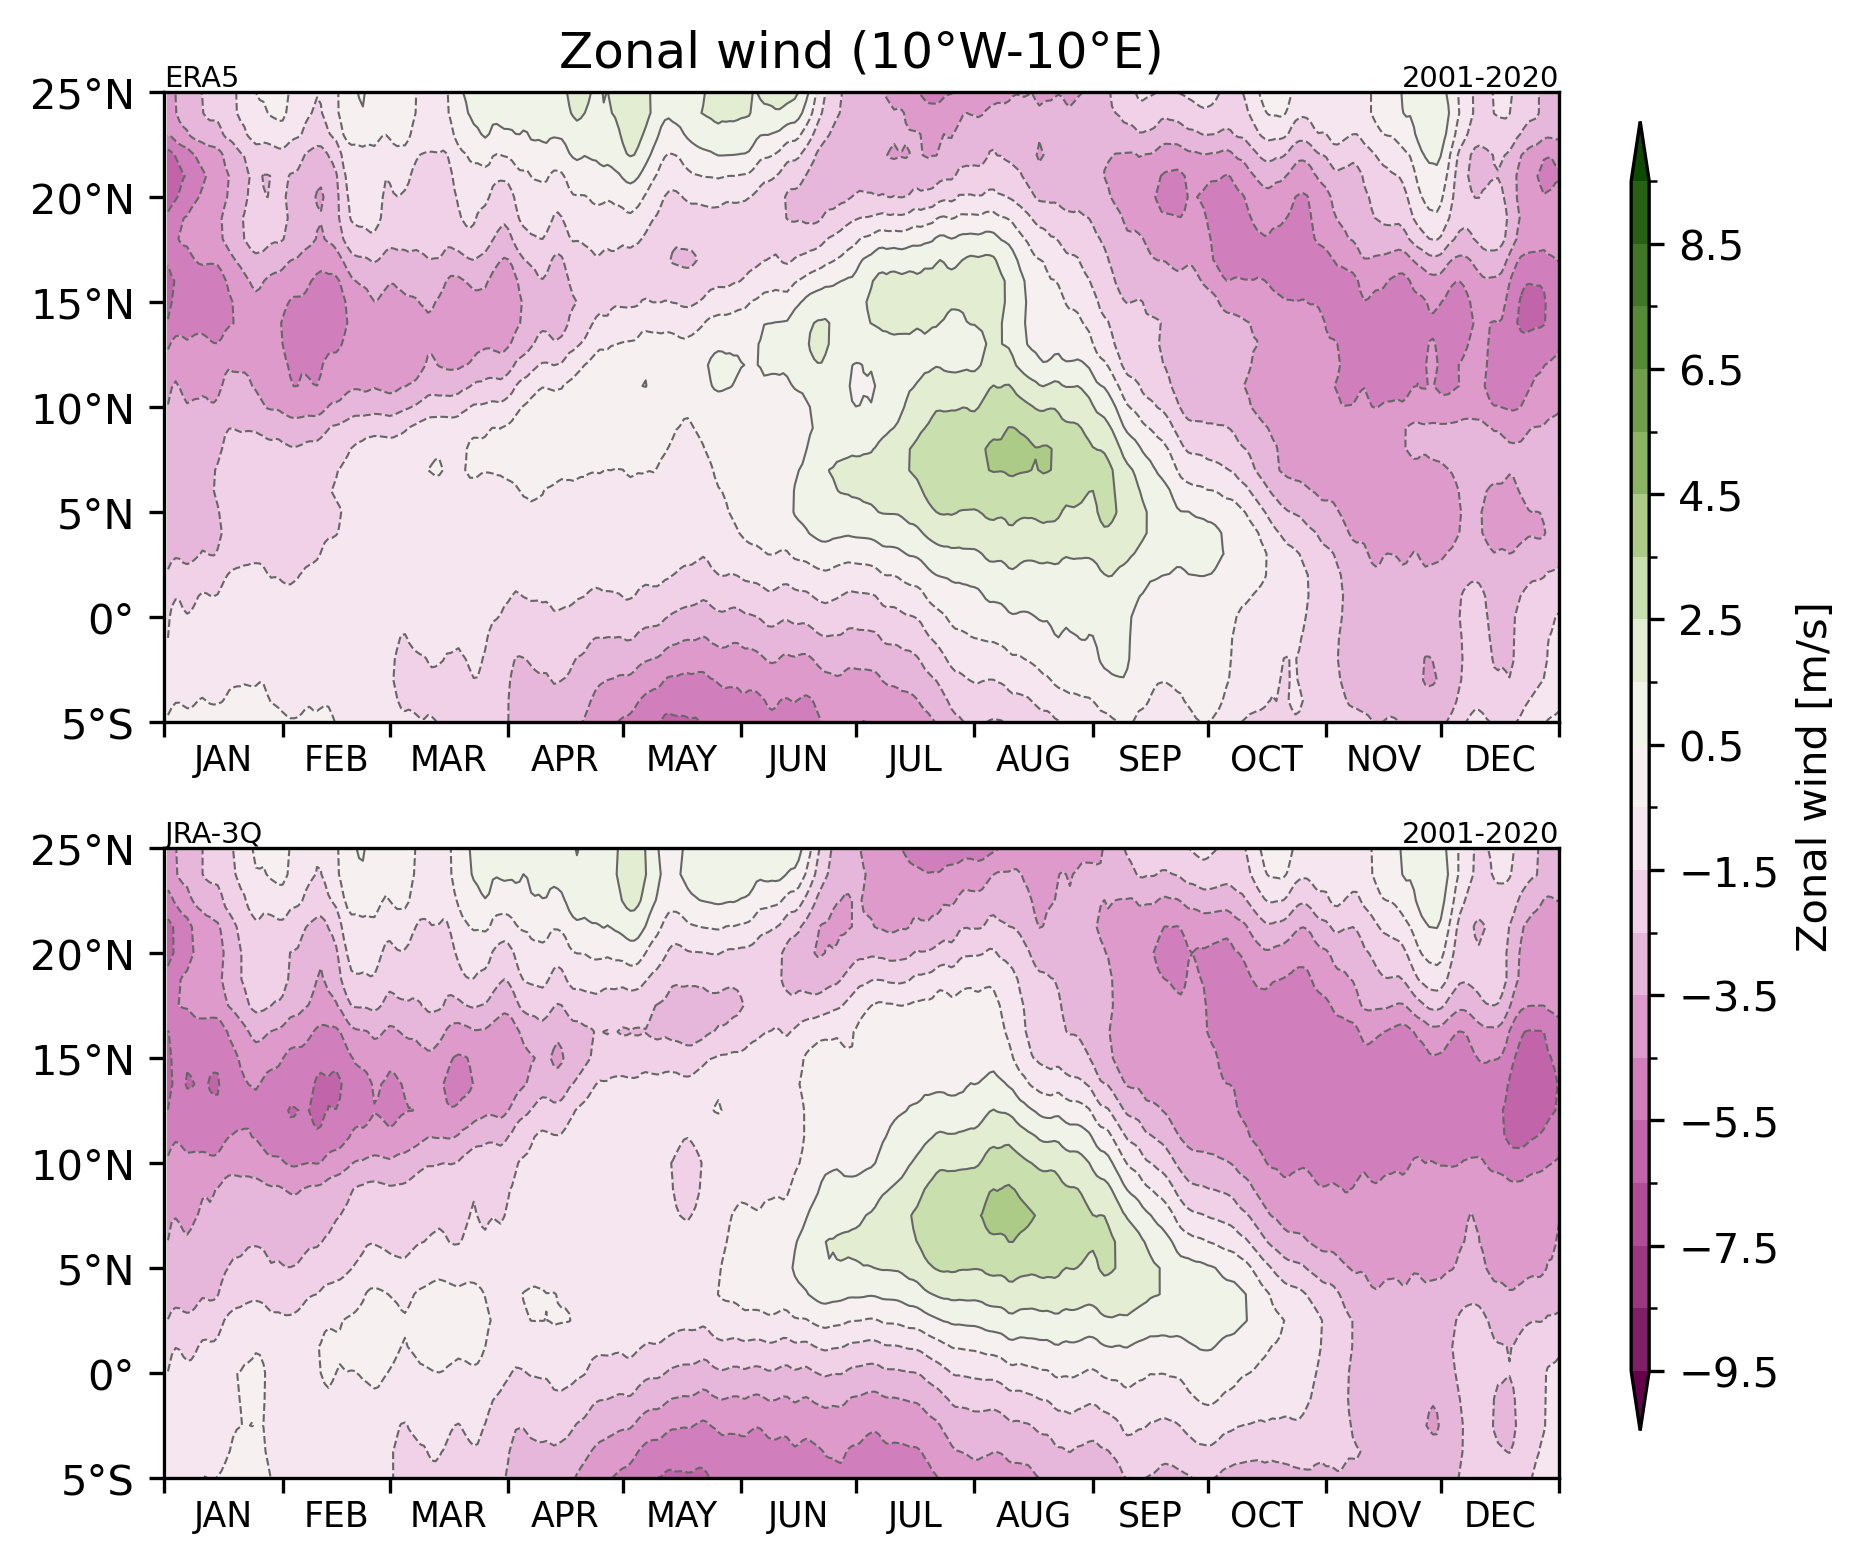